# Marwa Elsayed Khalil

# Importing the libraries

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#  Importing the data

In [3]:
df = pd.read_csv(r"C:\Users\MARWA\Desktop\My Files\projects\heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,2,140,289,0,1,172,0,0.0,1,0
1,49,0,3,160,180,0,1,156,0,1.0,0,1
2,37,1,2,130,283,0,2,98,0,0.0,1,0
3,48,0,1,138,214,0,1,108,1,1.5,0,1
4,54,1,3,150,195,0,1,122,0,0.0,1,0


In [4]:
x=df.loc[ : ,'Age':'ST_Slope']
x

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,2,140,289,0,1,172,0,0.0,1
1,49,0,3,160,180,0,1,156,0,1.0,0
2,37,1,2,130,283,0,2,98,0,0.0,1
3,48,0,1,138,214,0,1,108,1,1.5,0
4,54,1,3,150,195,0,1,122,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,4,110,264,0,1,132,0,1.2,0
914,68,1,1,144,193,1,1,141,0,3.4,0
915,57,1,1,130,131,0,1,115,1,1.2,0
916,57,0,2,130,236,0,3,174,0,0.0,0


In [5]:
y=df.loc[ : ,['HeartDisease']]
y

,HeartDisease
0,0
1,1
2,0
3,1
4,0
...,...
913,1
914,1
915,1
916,1


In [6]:
x.shape
y.shape

(918, 1)

In [7]:
df.shape

(918, 12)

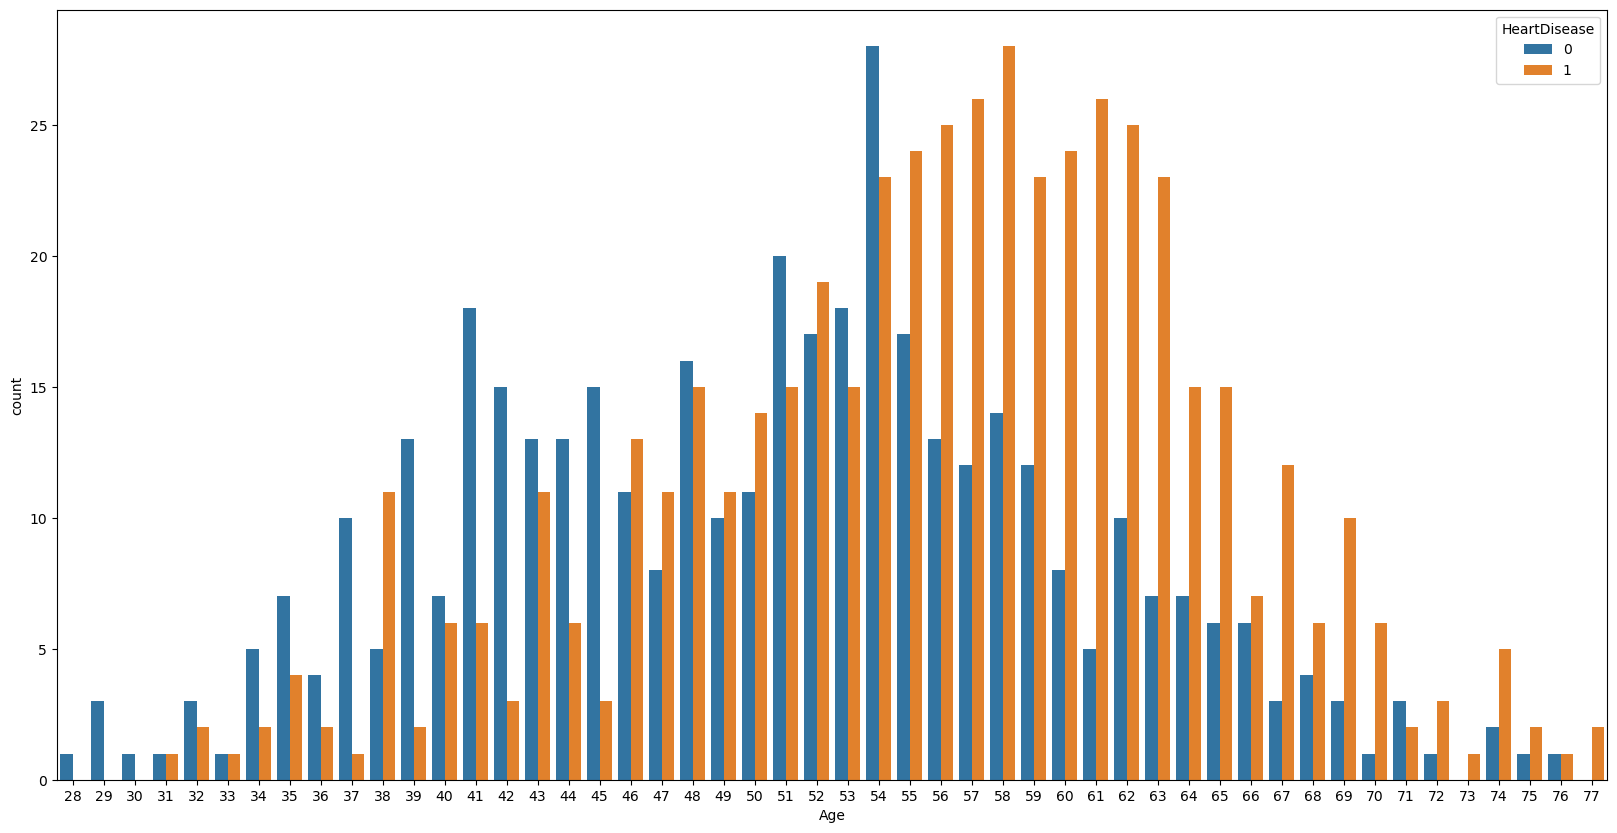

In [8]:
plt.figure(figsize = (20,10))
sns.countplot('Age', hue='HeartDisease', data=df);

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

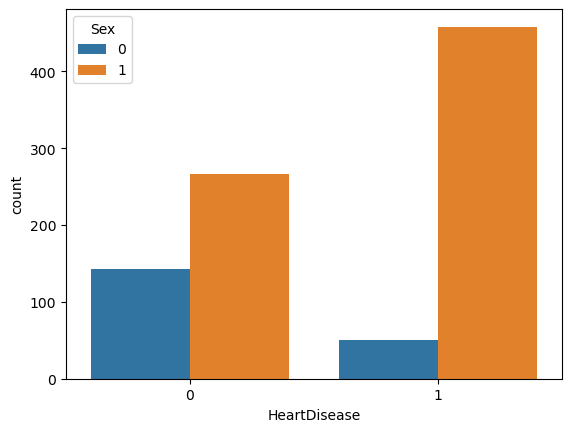

In [9]:
sns.countplot('HeartDisease',hue='Sex', data= df)

In [10]:
df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,1.781046,132.396514,198.799564,0.233115,1.603486,136.809368,0.404139,0.887364,0.567538,0.553377
std,9.432617,0.407701,0.956519,18.514154,109.384145,0.423046,0.805968,25.460334,0.490992,1.066570,0.618959,0.497414
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,1.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,0.000000,1.000000
75%,60.000000,1.000000,3.000000,140.000000,267.000000,0.000000,2.000000,156.000000,1.000000,1.500000,1.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,3.000000,202.000000,1.000000,6.200000,2.000000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


#  Splitting the data

In [12]:
# split the data into train and test set
#train, test = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)

#  Building a model

In [13]:
# Create a Sequential model
model = keras.Sequential([
    keras.layers.Dense(400, input_shape=(11,), activation='relu'),
    keras.layers.Dense(320, activation = 'tanh'),
    keras.layers.Dense(94, activation = 'softmax'),
    keras.layers.Dense(26, activation = 'relu'),
    keras.layers.Dense(2, activation = 'sigmoid')
])

# Summarise your model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 400)               4800      
                                                                 
 dense_1 (Dense)             (None, 320)               128320    
                                                                 
 dense_2 (Dense)             (None, 94)                30174     
                                                                 
 dense_3 (Dense)             (None, 26)                2470      
                                                                 
 dense_4 (Dense)             (None, 2)                 54        
                                                                 
Total params: 165,818
Trainable params: 165,818
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Compilation of model
model.compile(optimizer='sgd', loss='mse' , metrics=['accuracy'])

#losses : calculate the difference between the predicted output and the actual result

In [27]:
# fitting the model
model.fit(x, y,epochs=20, batch_size=35)

Epoch 1/20
27/27 [==============================] - 0s 990us/step - loss: 0.2285 - accuracy: 0.7113
Epoch 2/20
27/27 [==============================] - 0s 1ms/step - loss: 0.2276 - accuracy: 0.7190
Epoch 3/20
27/27 [==============================] - 0s 1ms/step - loss: 0.2271 - accuracy: 0.7157
Epoch 4/20
27/27 [==============================] - 0s 1ms/step - loss: 0.2263 - accuracy: 0.7157
Epoch 5/20
27/27 [==============================] - 0s 1ms/step - loss: 0.2268 - accuracy: 0.7059
Epoch 6/20
27/27 [==============================] - 0s 1ms/step - loss: 0.2254 - accuracy: 0.7157
Epoch 7/20
27/27 [==============================] - 0s 1ms/step - loss: 0.2254 - accuracy: 0.7168
Epoch 8/20
27/27 [==============================] - 0s 1ms/step - loss: 0.2252 - accuracy: 0.7113
Epoch 9/20
27/27 [==============================] - 0s 1ms/step - loss: 0.2239 - accuracy: 0.7146
Epoch 10/20
27/27 [==============================] - 0s 1ms/step - loss: 0.2234 - accuracy: 0.7200
Epoch 11/20
27/27

In [28]:
model.evaluate(x,y)

29/29 [==============================] - 0s 1ms/step - loss: 0.2175 - accuracy: 0.7266


[0.2174731343984604, 0.7265795469284058]